In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Sci-Kit Learn
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from kneed import KneeLocator
import plotly.express as px

# Default plot params
plt.style.use('seaborn')
cmap = 'tab10'

In [15]:
pcaData = pd.read_csv('./Data/PCAData.csv')
pcaData.drop(['Player','Team'],axis=1,inplace=True)
pcaData.describe().round(1)

,PC1,PC2,PC3,PC4,PC5
count,397.0,397.0,397.0,397.0,397.0
mean,-0.0,0.0,0.0,-0.0,0.0
std,5.4,4.7,2.8,2.5,2.1
min,-10.4,-8.2,-7.1,-6.3,-5.7
25%,-4.1,-3.3,-1.9,-1.6,-1.5
50%,-1.2,-1.0,-0.2,-0.0,-0.0
75%,3.3,2.3,1.9,1.6,1.3
max,16.9,16.5,8.1,8.9,9.6


In [16]:
pcaData

,PC1,PC2,PC3,PC4,PC5
0,-5.973640,10.348598,-4.544328,-2.790883,-1.291382
1,-1.975250,9.700635,-2.386559,-4.657934,-0.569510
2,-7.131777,11.506774,-0.629350,-4.972975,1.235958
3,14.068326,14.403856,-3.423371,4.085493,9.550238
4,8.082776,13.723707,2.125949,-1.052888,1.960181
...,...,...,...,...,...
392,-1.767053,-6.117506,2.412929,3.375371,1.891360
393,-5.746449,-3.612010,7.457901,3.099955,3.200641
394,-2.157475,-8.238167,2.602166,1.469678,1.456859
395,-1.642875,-7.951736,1.809158,-1.508661,1.187768


In [17]:
# to standardise the principle components
scaler = StandardScaler()
pcaDataScaled = scaler.fit_transform(pcaData)


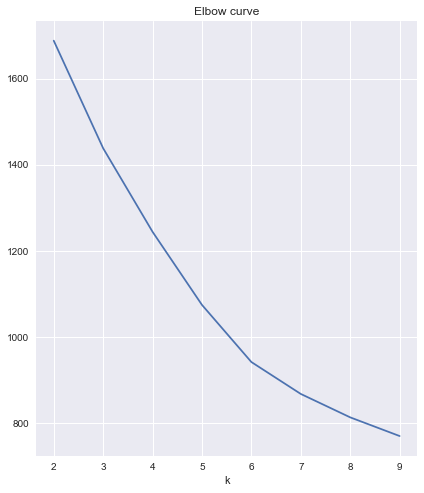

In [18]:
# Picking Best number of k part, using elbow method 
# Specifying the dataset and initializing variables
X = pcaDataScaled
distorsions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

In [19]:
kl = KneeLocator(range(2,10), distorsions, curve="convex", direction="decreasing")
kl.elbow

6

In [20]:
# Generate silhouette coefficient for each k
X = pcaDataScaled
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

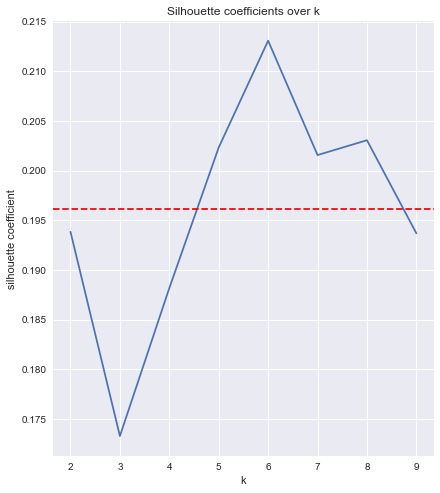

In [21]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [22]:
# # check if components are standardised
# pcaDataScaled = pd.DataFrame(pcaDataScaled, columns = ['PC1','PC2','PC3','PC4','PC5'])
# pcaDataScaled.describe().round(1)

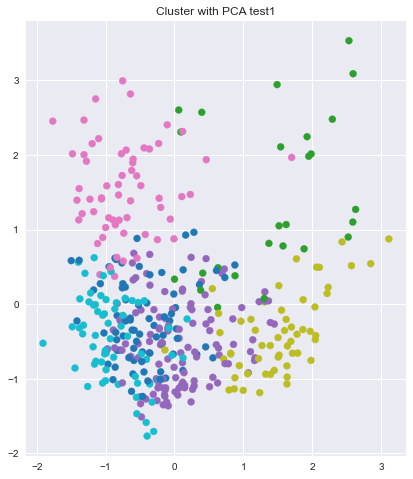

In [23]:
#Predict K-Means cluster membership
km_neat = KMeans(n_clusters=6, random_state=2).fit_predict(pcaDataScaled)
#km_messy = KMeans(n_clusters=3, random_state=2).fit_predict(x_messy)

plt.figure(figsize=(15,8))
plt.subplot(121, title='Cluster with PCA test1')

plt.scatter(pcaDataScaled[:,0], pcaDataScaled[:,1], c=km_neat, cmap=cmap)

In [24]:
km_neat

array([3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 3, 1, 3, 3, 3, 0, 2, 1,
       2, 2, 3, 0, 3, 0, 3, 0, 0, 3, 3, 2, 2, 3, 0, 2, 4, 3, 3, 2, 1, 0,
       3, 0, 0, 1, 2, 4, 4, 3, 4, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 4, 0,
       3, 2, 1, 2, 2, 0, 0, 5, 3, 0, 3, 0, 4, 2, 0, 2, 0, 5, 4, 0, 0, 2,
       2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 5, 2, 5, 4, 2, 4, 2,
       4, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 5, 5, 0, 0, 0, 0, 4, 4, 3, 5, 5,
       5, 2, 0, 0, 0, 0, 2, 0, 0, 2, 4, 0, 0, 0, 2, 2, 0, 0, 4, 0, 2, 0,
       0, 2, 2, 0, 2, 0, 4, 4, 2, 5, 2, 1, 5, 4, 2, 2, 4, 2, 2, 5, 5, 4,
       4, 5, 0, 2, 5, 2, 5, 4, 2, 5, 0, 2, 4, 0, 0, 4, 5, 2, 2, 5, 4, 5,
       4, 5, 5, 5, 0, 5, 2, 5, 2, 4, 0, 4, 2, 0, 5, 2, 4, 5, 5, 2, 4, 2,
       2, 2, 2, 4, 0, 4, 4, 0, 0, 2, 4, 2, 0, 4, 0, 5, 2, 5, 2, 2, 0, 0,
       5, 5, 5, 5, 5, 2, 2, 5, 4, 4, 4, 2, 0, 0, 2,

In [29]:
pcaDataScaled = pd.DataFrame(pcaDataScaled, columns = ['PC1','PC2','PC3','PC4','PC5'])

In [32]:
fig2 = px.scatter_3d(pcaDataScaled, x='PC1', y='PC2', z='PC3',color=km_neat)
fig2